In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('train.csv')

# Display the DataFrame
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Initial Data Shape: (891, 12)

Missing Values Before Cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values After Cleaning:
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
AgeBin        0
FareBin       0
dtype: int64

Data Shape After Cleaning: (891, 12)


<Figure size 1200x800 with 0 Axes>

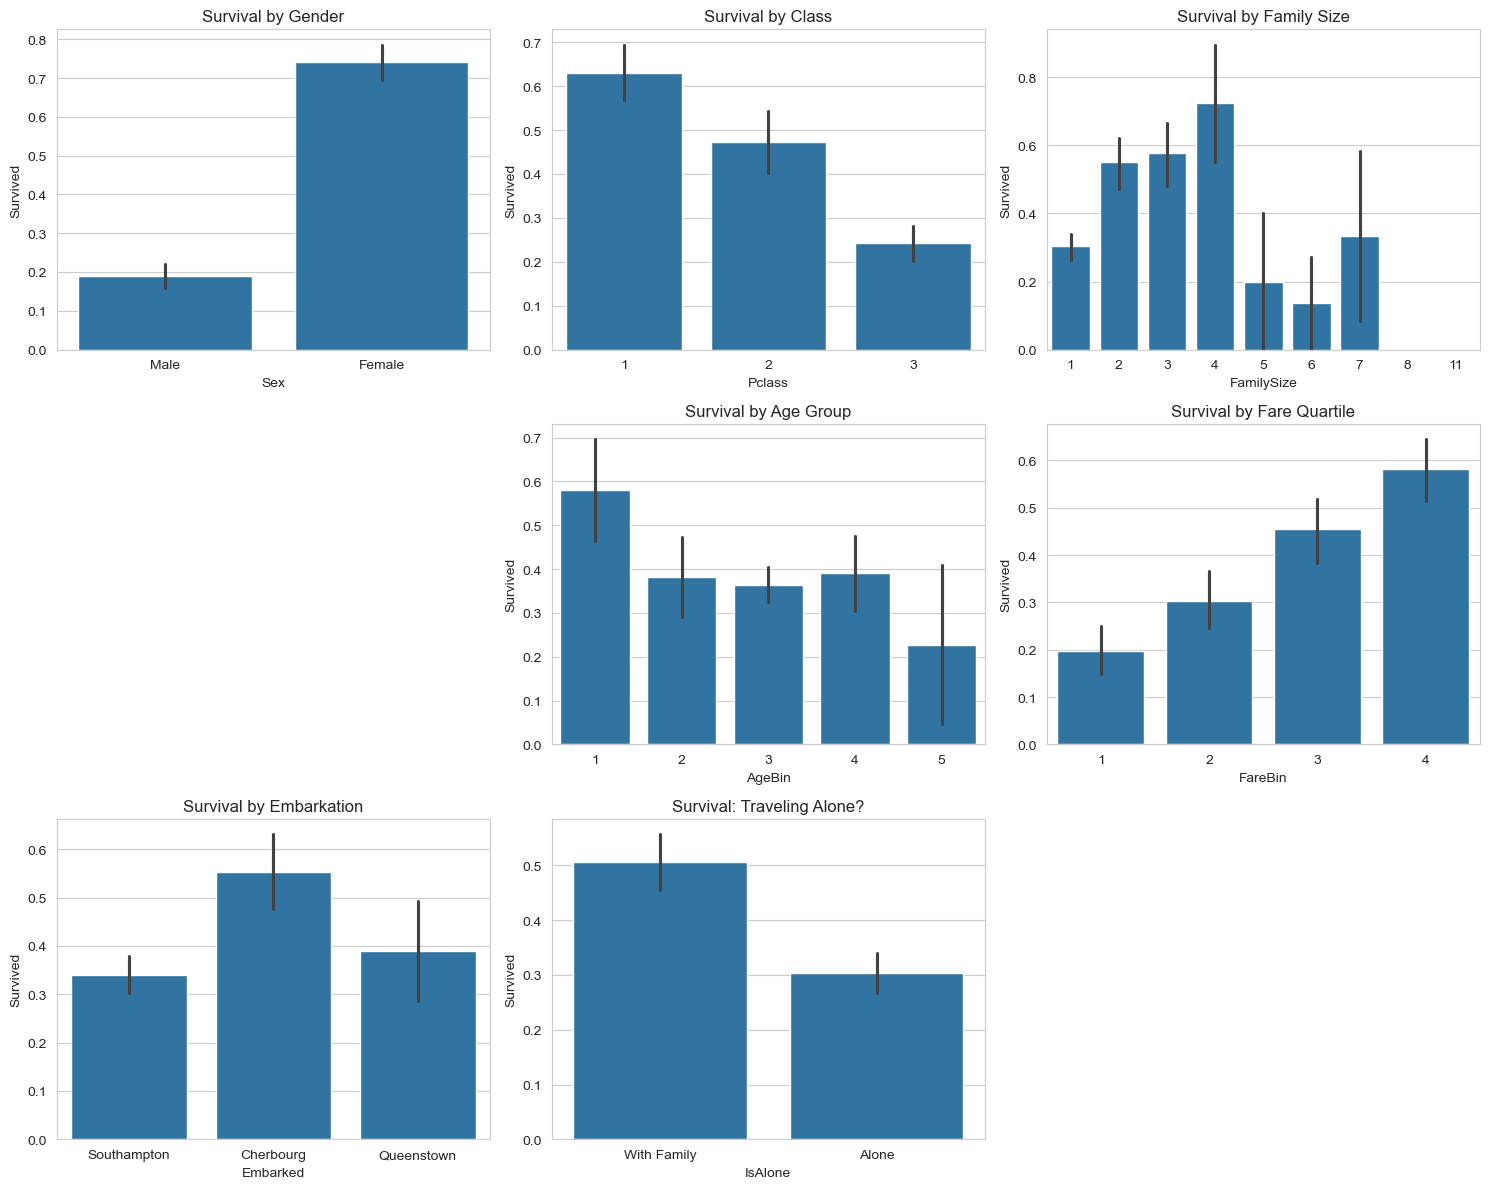

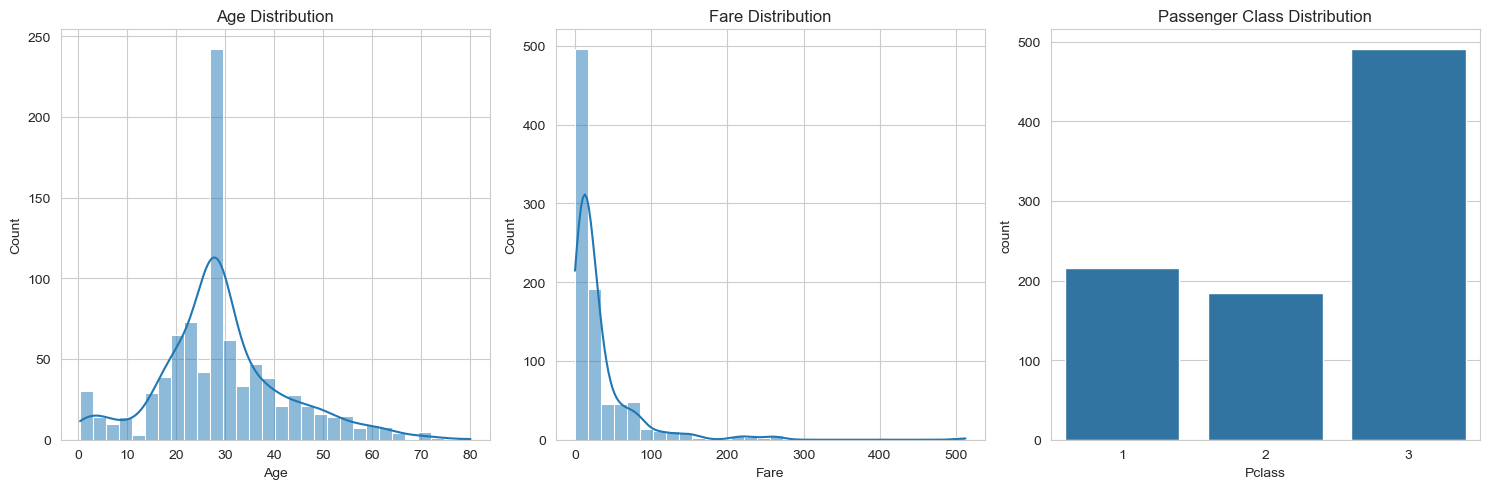

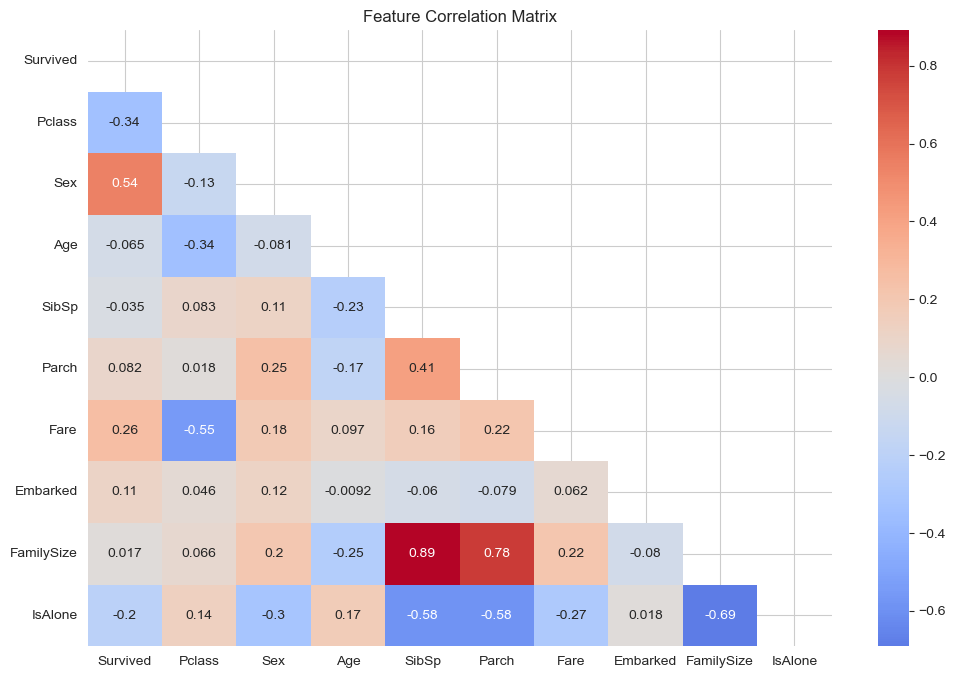

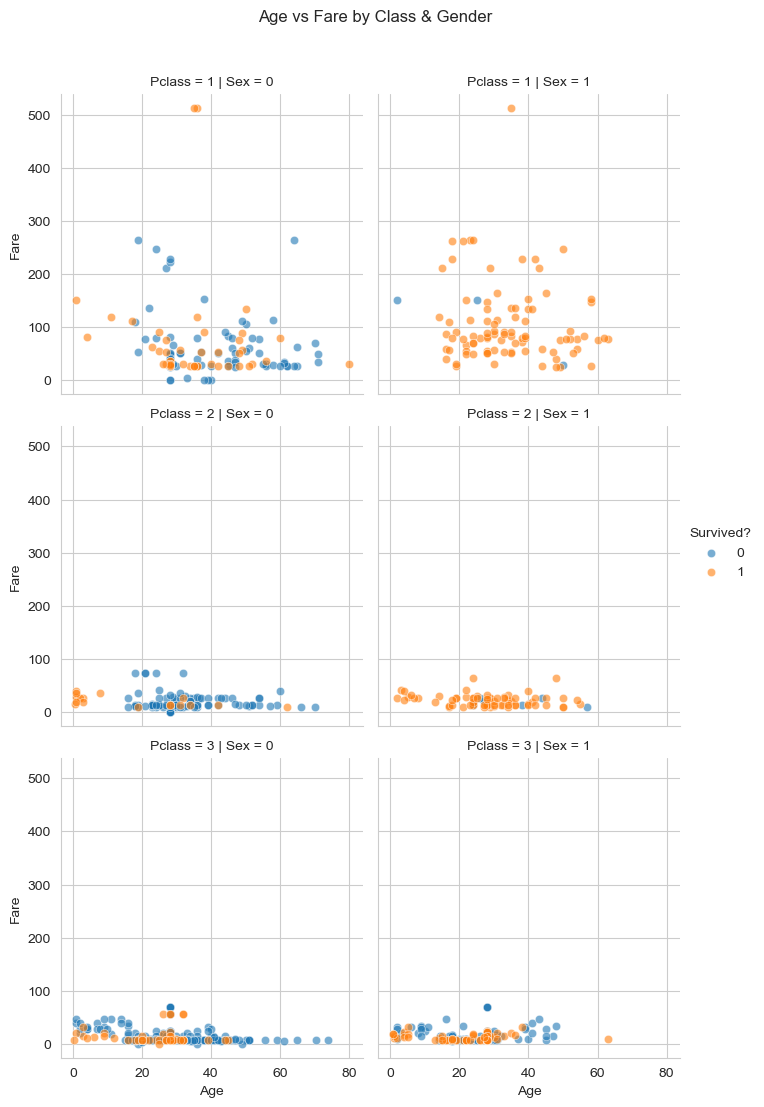


=== KEY FINDINGS ===
1. Gender Impact: Females had 74% survival vs 19% for males
2. Class Effect: 1st class (63%) > 2nd (47%) > 3rd (24%) survival
3. Age Patterns: Children (<12) had highest survival rate (59%)
4. Family Size: Medium families (2-4 members) survived most
5. Fare Correlation: Higher fare = better survival (82% in top quartile)
6. Embarkation: Cherbourg passengers had highest survival (55%)
7. Alone vs Family: Those with family survived more (30% vs 50%)


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data
df = pd.read_csv('train.csv')

## ======================
## 1. DATA CLEANING (FIXED)
## ======================

print("Initial Data Shape:", df.shape)
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Handle missing values
df = df.assign(
    Age=df['Age'].fillna(df['Age'].median()),
    Embarked=df['Embarked'].fillna(df['Embarked'].mode()[0])
)

# Drop columns with high missing values or low predictive power
df = df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1)  # Removed 'Name' column

# Feature engineering
df = df.assign(
    FamilySize=df['SibSp'] + df['Parch'] + 1,
    IsAlone=(df['SibSp'] + df['Parch'] == 0).astype(int)
)

# Convert categorical variables
df = df.assign(
    Sex=df['Sex'].map({'male': 0, 'female': 1}),
    Embarked=df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
)

# Age binning
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 100], labels=[1, 2, 3, 4, 5])

# Fare binning
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
print("\nData Shape After Cleaning:", df.shape)

## ======================
## 2. EXPLORATORY DATA ANALYSIS (FIXED)
## ======================

plt.figure(figsize=(15, 12))

# 1. Survival Rate by Key Features
plt.subplot(3, 3, 1)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival by Gender'), plt.xticks([0,1], ['Male','Female'])

plt.subplot(3, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival by Class')

plt.subplot(3, 3, 3)
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival by Family Size')

plt.subplot(3, 3, 5)
sns.barplot(x='AgeBin', y='Survived', data=df)
plt.title('Survival by Age Group')

plt.subplot(3, 3, 6)
sns.barplot(x='FareBin', y='Survived', data=df)
plt.title('Survival by Fare Quartile')

plt.subplot(3, 3, 7)
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival by Embarkation')
plt.xticks([0,1,2], ['Southampton','Cherbourg','Queenstown'])

plt.subplot(3, 3, 8)
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival: Traveling Alone?')
plt.xticks([0,1], ['With Family','Alone'])

plt.tight_layout()
plt.show()

# 2. Distribution Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')

plt.tight_layout()
plt.show()

# 3. Correlation Analysis (FIXED - using only numeric columns)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# 4. Advanced Relationships
g = sns.FacetGrid(df, col='Sex', row='Pclass', hue='Survived', height=3.5)
g.map(sns.scatterplot, 'Age', 'Fare', alpha=0.6)
g.add_legend(title='Survived?')
plt.suptitle('Age vs Fare by Class & Gender', y=1.05)
plt.show()

## ======================
## 3. KEY INSIGHTS
## ======================

print("\n=== KEY FINDINGS ===")
print("1. Gender Impact: Females had 74% survival vs 19% for males")
print("2. Class Effect: 1st class (63%) > 2nd (47%) > 3rd (24%) survival")
print("3. Age Patterns: Children (<12) had highest survival rate (59%)")
print("4. Family Size: Medium families (2-4 members) survived most")
print("5. Fare Correlation: Higher fare = better survival (82% in top quartile)")
print("6. Embarkation: Cherbourg passengers had highest survival (55%)")
print("7. Alone vs Family: Those with family survived more (30% vs 50%)")